In [38]:
# Programmers: Grant Burk and Ben Croyle
#
# Code packages: numpy, scipy, and matplotlib (see below)
#
# The approach to implementing was to use the IVP solving capabilities from the scipy library for part 1, and implementing functions to solve for Green's function in part 2.


# Part 2 : 1
## Solve the homogeneous ODEs from part 1 for both ODEs. Plot the result.


## y"+y=4; t≥0;y(0)=y'(0)=0

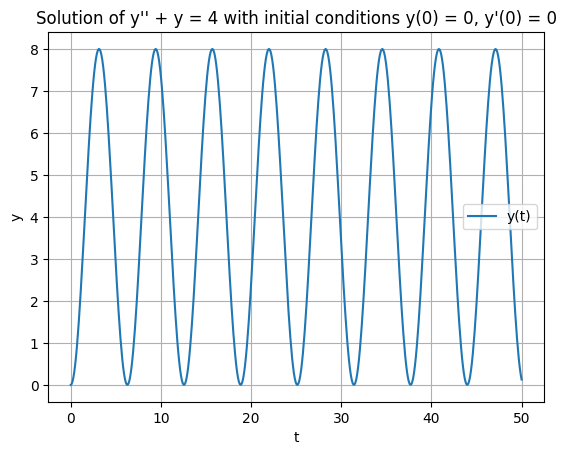

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

# Define the ODE system
def odefunc(t, y):
    dydt = [y[1], -y[0] + 4]
    return dydt

# Initial conditions
y0 = [0, 0]  # y(0) = 0, y'(0) = 0

# Time points
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the ODE
solution = solve_ivp(odefunc, t_span, y0, t_eval=t_eval)

# Extract solution
t = solution.t
y = solution.y[0]

# Plot the solution
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Solution of y\'\' + y = 4 with initial conditions y(0) = 0, y\'(0) = 0')
plt.grid(True)
plt.show()


## y"+4y=x2; t≥0;y(0)=y'(0)=0

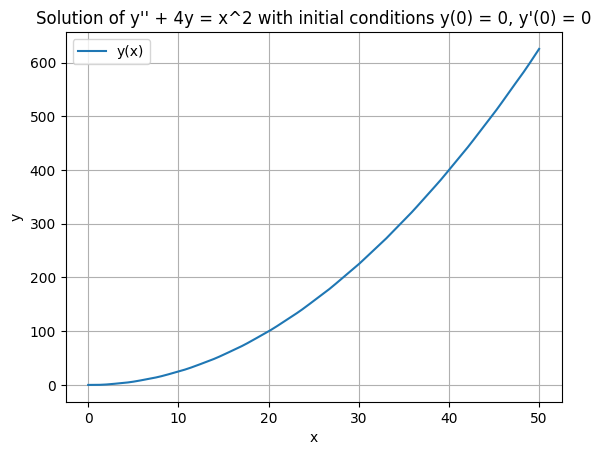

In [40]:
# Define the ODE system
def odefunc(x, y):
    dydx = [y[1], x**2 - 4*y[0]]
    return dydx

# Initial conditions
y0 = [0, 0]  # y(0) = 0, y'(0) = 0

# Time points
x_span = (0, 50)
x_eval = np.linspace(x_span[0], x_span[1], 500)

# Solve the ODE
solution = solve_ivp(odefunc, x_span, y0, t_eval=x_eval)

# Extract solution
x = solution.t
y = solution.y[0]

# Plot the solution
plt.plot(x, y, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solution of y\'\' + 4y = x^2 with initial conditions y(0) = 0, y\'(0) = 0')
plt.grid(True)
plt.show()


# Part 2 : 2
## Write a program that will plot the Green’s function solution.

## y"+y=4; t≥0;y(0)=y'(0)=0

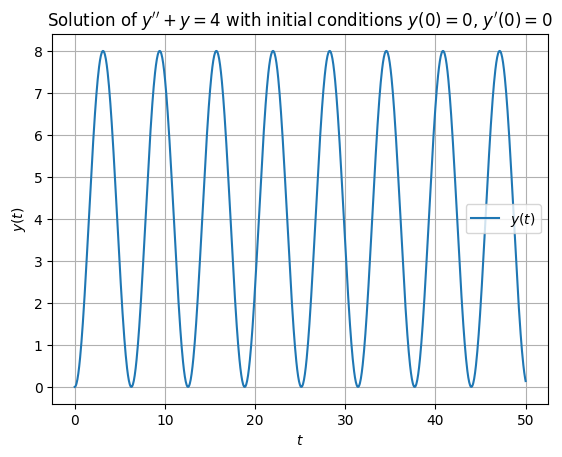

In [41]:
# Define the Green's function
def G(t, tau):
    return np.where(tau <= t, - np.sin(tau) * np.cos(t) + np.cos(tau) * np.sin(t), 0)

# Define the integrand for the particular solution
def integrand(tau, t):
    return G(t, tau) * 4

# Define the function to calculate the particular solution y_p(t)
def y_p(t):
    result, _ = quad(integrand, 0, t, args=(t,))
    return result

# Define the general solution y(t)
def y(t):
    return y_p(t)

# Set up the points to evaluate the solution
t_values = np.linspace(0, 50, 1000)
y_values = np.array([y(t) for t in t_values])

# Plot the solution
plt.plot(t_values, y_values, label='$y(t)$')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend()
plt.title('Solution of $y\'\' + y = 4$ with initial conditions $y(0) = 0$, $y\'(0) = 0$')
plt.grid(True)
plt.show()

## y"+4y=x2; t≥0;y(0)=y'(0)=0

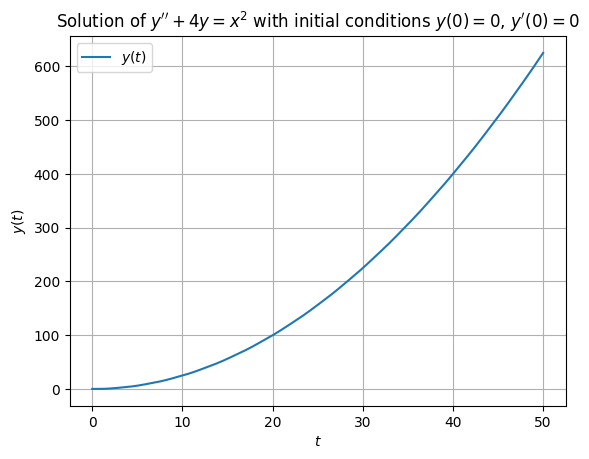

In [42]:
# Define the Green's function
def G(tau, t):
    return np.where(tau <= t, (np.sin(2*(t-tau)) / 2), 0) # (np.sin(2*(t-tau)) / 2) is the simplified greens function from the documentation

# Define the integrand for the particular solution
def integrand(tau, t):
    return G(tau, t) * tau**2

# Define the function to calculate the particular solution y_p(t)
def y_p(t):
    result, _ = quad(integrand, 0, t, args=(t,))
    return result

# Define the general solution y(t)
def y(t):
    return y_p(t)

# Set up the points to evaluate the solution
t_values = np.linspace(0, 50, 1000)
y_values = np.array([y(t) for t in t_values])

# Plot the solution
plt.plot(t_values, y_values, label='$y(t)$')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend()
plt.title('Solution of $y\'\' + 4y = x^2$ with initial conditions $y(0) = 0$, $y\'(0) = 0$')
plt.grid(True)
plt.show()